In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
data1 =pd.read_excel('Data/Table 1. Retail turnover, by industry group 850101.xlsx',sheet_name="Data1")
data1 = data1.drop(range(0,9))
data1 = data1.rename(columns = {'Unnamed: 0':'Month'})
data1.head()
# 6 Different Indsutries in this Dataframe, SEASONALLY ADJUSTED IS MOST ACCURATE

,Month,Turnover ; Total (State) ; Food retailing ;,Turnover ; Total (State) ; Household goods retailing ;,"Turnover ; Total (State) ; Clothing, footwear and personal accessory retailing ;",Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;,Turnover ; Total (State) ; Food retailing ;.1,Turnover ; Total (State) ; Household goods retailing ;.1,...,Turnover ; Total (State) ; Other retailing ;.1,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;.1",Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; Total (State) ; Food retailing ;.2,Turnover ; Total (State) ; Household goods retailing ;.2,"Turnover ; Total (State) ; Clothing, footwear and personal accessory retailing ;.2",Turnover ; Total (State) ; Department stores ;.2,Turnover ; Total (State) ; Other retailing ;.2,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;.2",Turnover ; Total (State) ; Total (Industry) ;.2
9,1982-04-01 00:00:00,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.2,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.6,482.4,505.1,347.6,3523.4
10,1982-05-01 00:00:00,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.6,...,502.3,346.3,3527.6,1181.7,654.1,361.9,484.2,504.9,346.3,3533.6
11,1982-06-01 00:00:00,1160,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.8,...,506.9,350.8,3561.5,1192.7,655.7,361.9,486.4,504.7,345.9,3547
12,1982-07-01 00:00:00,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.5,...,503.6,341.5,3553.9,1203.2,656.6,361.7,488.6,505.3,345.5,3560.6
13,1982-08-01 00:00:00,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.9,659.7,...,505.9,342.7,3581.8,1213.6,656.5,362,489.8,505.6,346.4,3573.6


In [58]:
data_by_state =pd.read_excel('Data/Table 3. Retail turnover, by state 850103.xlsx',sheet_name="Data1")
data_by_state = data_by_state.drop(range(0,9))
data_by_state = data_by_state.rename(columns = {'Unnamed: 0':'Month'})
data_by_state.head()
data_by_state.columns

Index(['Month', 'Turnover ;  New South Wales ;  Total (Industry) ;',
       'Turnover ;  Victoria ;  Total (Industry) ;',
       'Turnover ;  Queensland ;  Total (Industry) ;',
       'Turnover ;  South Australia ;  Total (Industry) ;',
       'Turnover ;  Western Australia ;  Total (Industry) ;',
       'Turnover ;  Tasmania ;  Total (Industry) ;',
       'Turnover ;  Northern Territory ;  Total (Industry) ;',
       'Turnover ;  Australian Capital Territory ;  Total (Industry) ;',
       'Turnover ;  Total (State) ;  Total (Industry) ;',
       'Turnover ;  New South Wales ;  Total (Industry) ;.1',
       'Turnover ;  Victoria ;  Total (Industry) ;.1',
       'Turnover ;  Queensland ;  Total (Industry) ;.1',
       'Turnover ;  South Australia ;  Total (Industry) ;.1',
       'Turnover ;  Western Australia ;  Total (Industry) ;.1',
       'Turnover ;  Tasmania ;  Total (Industry) ;.1',
       'Turnover ;  Northern Territory ;  Total (Industry) ;.1',
       'Turnover ;  Australian Cap

In [5]:
data_by_state_and_industry =pd.read_excel('Data/Table 12. Retail turnover, state by industry subgroup, seasonally adjusted.xlsx',sheet_name="Data1")
data_by_state_and_industry = data_by_state_and_industry.drop(range(0,9))
data_by_state_and_industry = data_by_state_and_industry.rename(columns = {'Unnamed: 0':'Month'})
data_by_state_and_industry.head()
data_by_state_and_industry.columns

Index(['Month',
       'Turnover ;  New South Wales ;  Supermarket and grocery stores ;',
       'Turnover ;  New South Wales ;  Liquor retailing ;',
       'Turnover ;  New South Wales ;  Other specialised food retailing ;',
       'Turnover ;  New South Wales ;  Food retailing ;',
       'Turnover ;  New South Wales ;  Furniture, floor coverings, houseware and textile goods retailing ;',
       'Turnover ;  New South Wales ;  Electrical and electronic goods retailing ;',
       'Turnover ;  New South Wales ;  Hardware, building and garden supplies retailing ;',
       'Turnover ;  New South Wales ;  Household goods retailing ;',
       'Turnover ;  New South Wales ;  Clothing retailing ;',
       ...
       'Turnover ;  Total (State) ;  Department stores ;',
       'Turnover ;  Total (State) ;  Newspaper and book retailing ;',
       'Turnover ;  Total (State) ;  Other recreational goods retailing ;',
       'Turnover ;  Total (State) ;  Pharmaceutical, cosmetic and toiletry goods re

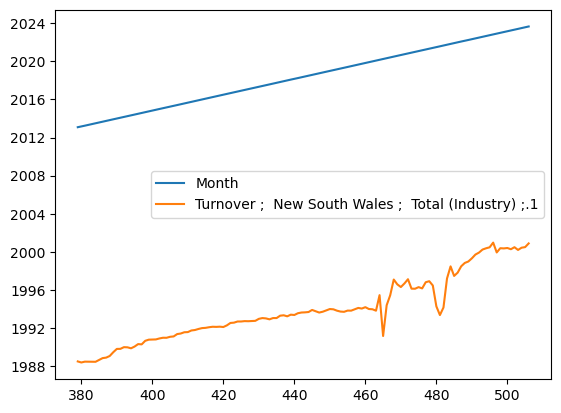

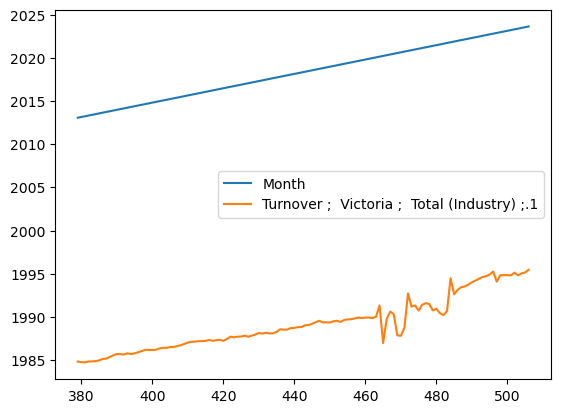

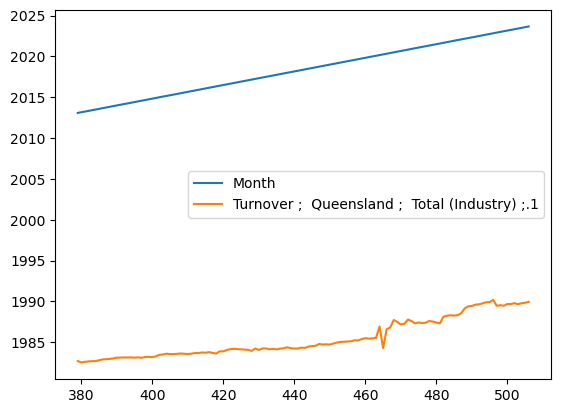

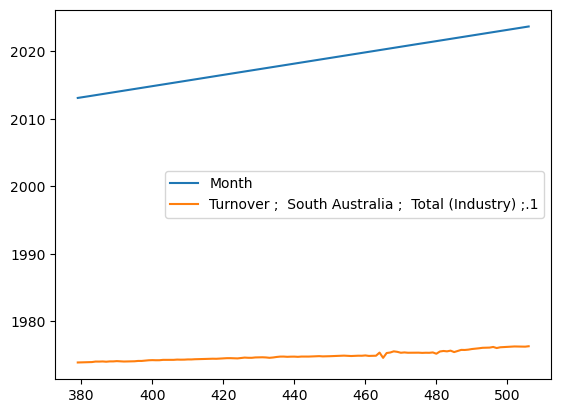

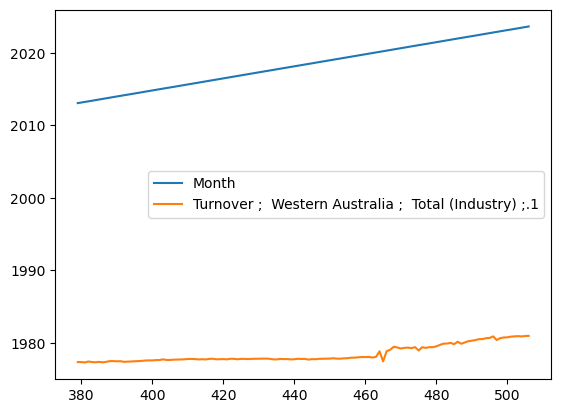

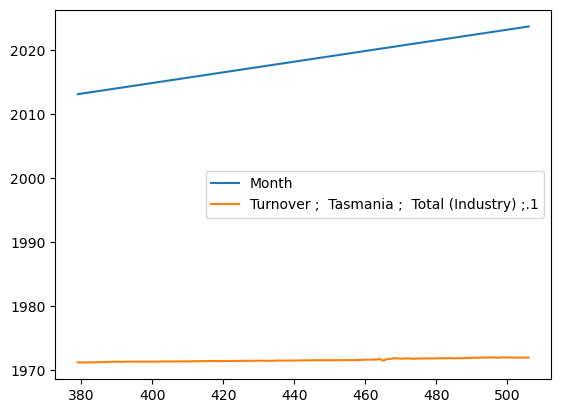

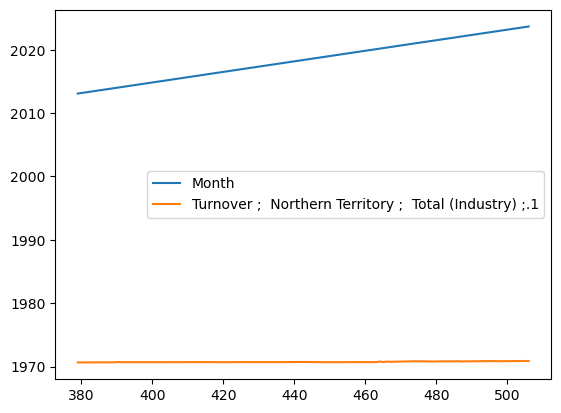

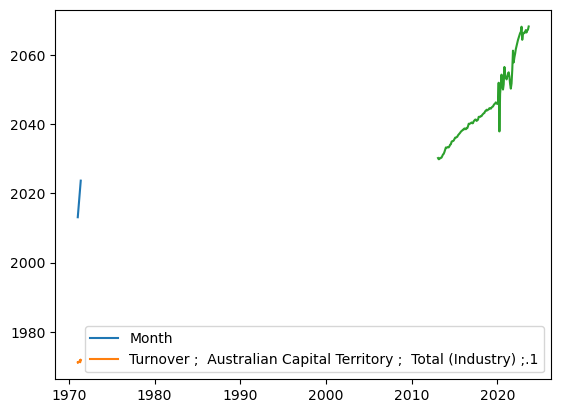

In [74]:
data_by_state_Q1data = data_by_state.drop(range(9, 379))
#data_by_state_Q1data["Month"]= pd.to_datetime(data_by_state_Q1data["Month"]) 

data_by_state_Q1data_seasonal= data_by_state_Q1data.loc[: , ['Month', 
                                                             'Turnover ;  New South Wales ;  Total (Industry) ;.1',
                                                             'Turnover ;  Victoria ;  Total (Industry) ;.1',
                                                             'Turnover ;  Queensland ;  Total (Industry) ;.1',
                                                             'Turnover ;  South Australia ;  Total (Industry) ;.1',
                                                             'Turnover ;  Western Australia ;  Total (Industry) ;.1',
                                                             'Turnover ;  Tasmania ;  Total (Industry) ;.1',
                                                             'Turnover ;  Northern Territory ;  Total (Industry) ;.1',
                                                             'Turnover ;  Australian Capital Territory ;  Total (Industry) ;.1',
                                                             'Turnover ;  Total (State) ;  Total (Industry) ;.1']]
data_by_state_Q1data_seasonal["Month"] = pd.to_datetime(data_by_state_Q1data_seasonal["Month"]) 
data_by_state_Q1data_seasonal.set_index("Month")
NSW=data_by_state_Q1data_seasonal.iloc[:, [0, 1]]
firstlineplot = NSW.plot.line()
VIC = data_by_state_Q1data_seasonal.iloc[:, [0, 2]]
secondplotline = VIC.plot.line()
Queensland = data_by_state_Q1data_seasonal.iloc[:, [0, 3]]
thirdplotline = Queensland.plot.line()
SA = data_by_state_Q1data_seasonal.iloc[:, [0, 4]]
fourthplotline = SA.plot.line()
WA = data_by_state_Q1data_seasonal.iloc[:, [0, 5]]
fivethplotline = WA.plot.line()
Tas = data_by_state_Q1data_seasonal.iloc[:, [0, 6]]
sixthplotline = Tas.plot.line()
NT = data_by_state_Q1data_seasonal.iloc[:, [0, 7]]
sixthplotline = NT.plot.line()
ACT = data_by_state_Q1data_seasonal.iloc[:, [0, 8]]
sixthplotline = ACT.plot.line()
tot = data_by_state_Q1data_seasonal.iloc[:, [0, 9]]
xaxis = data_by_state_Q1data_seasonal.iloc[:, 0].to_xarray()
yaxis = data_by_state_Q1data_seasonal.iloc[:, 9].to_xarray()
seventhplotline = plt.plot(xaxis, yaxis)
plt.show()
firstlineplot
secondplotline
thirdplotline
fourthplotline
fivethplotline
sixthplotline
seventhplotline